<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/4_Pytorch_Misclassifications_and_Model_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

print("GPU Available: {}".format(torch.cuda.is_available()))

device = 'cuda'

GPU Available: True


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define imshow function
def imgshow(title = "", image = None, size = 6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print('Image not found')

**Load MNIST data**

In [ ]:
from torch.utils.data import DataLoader, Dataset


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

testset = torchvision.datasets.MNIST('mnist', train = False, download = True, transform = transform)

testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=0)

**Create Model Definition Class**

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64 * 12 * 12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
net = Net()
net.to(device)

net.load_state_dict(torch.load('mnist_cnn_net.pth'))

<All keys matched successfully>

Acutual Label: 4, Predicted Label: 0


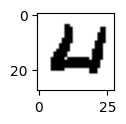

Acutual Label: 4, Predicted Label: 9


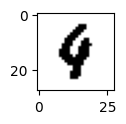

Acutual Label: 4, Predicted Label: 2


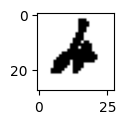

Acutual Label: 6, Predicted Label: 0


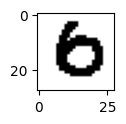

Acutual Label: 9, Predicted Label: 7


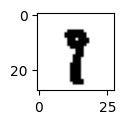

Acutual Label: 2, Predicted Label: 7


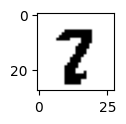

Acutual Label: 5, Predicted Label: 3


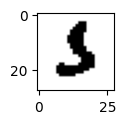

Acutual Label: 6, Predicted Label: 0


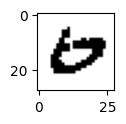

Acutual Label: 3, Predicted Label: 5


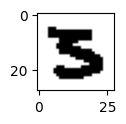

Acutual Label: 4, Predicted Label: 9


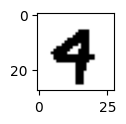

Acutual Label: 8, Predicted Label: 2


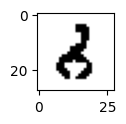

Acutual Label: 8, Predicted Label: 3


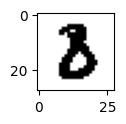

Acutual Label: 2, Predicted Label: 1


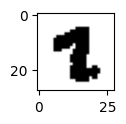

Acutual Label: 5, Predicted Label: 3


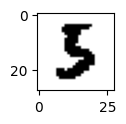

Acutual Label: 7, Predicted Label: 3


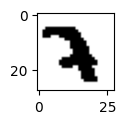

Acutual Label: 5, Predicted Label: 8


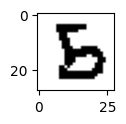

Acutual Label: 4, Predicted Label: 9


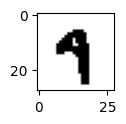

Acutual Label: 8, Predicted Label: 7


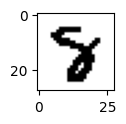

Acutual Label: 9, Predicted Label: 7


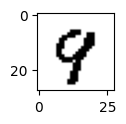

Acutual Label: 3, Predicted Label: 5


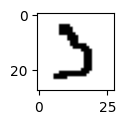

Acutual Label: 8, Predicted Label: 9


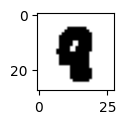

Acutual Label: 6, Predicted Label: 0


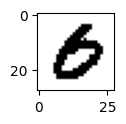

Acutual Label: 6, Predicted Label: 5


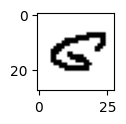

Acutual Label: 7, Predicted Label: 2


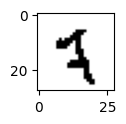

Acutual Label: 6, Predicted Label: 8


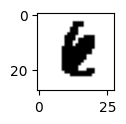

Acutual Label: 6, Predicted Label: 1


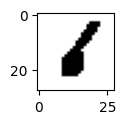

Acutual Label: 6, Predicted Label: 5


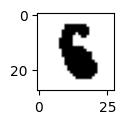

Acutual Label: 8, Predicted Label: 5


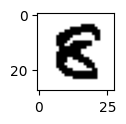

Acutual Label: 7, Predicted Label: 2


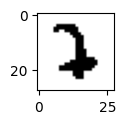

Acutual Label: 9, Predicted Label: 4


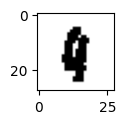

Acutual Label: 4, Predicted Label: 9


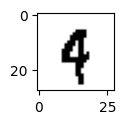

Acutual Label: 9, Predicted Label: 0


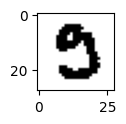

Acutual Label: 7, Predicted Label: 1


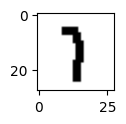

Acutual Label: 5, Predicted Label: 7


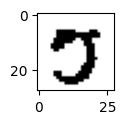

Acutual Label: 8, Predicted Label: 0


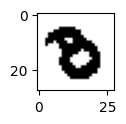

Acutual Label: 7, Predicted Label: 2


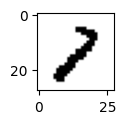

Acutual Label: 8, Predicted Label: 2


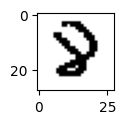

Acutual Label: 5, Predicted Label: 3


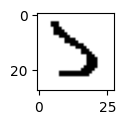

Acutual Label: 4, Predicted Label: 9


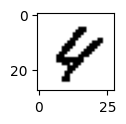

Acutual Label: 7, Predicted Label: 1


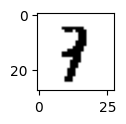

Acutual Label: 7, Predicted Label: 9


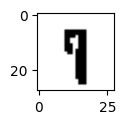

Acutual Label: 8, Predicted Label: 7


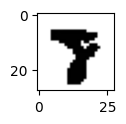

Acutual Label: 4, Predicted Label: 2


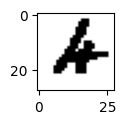

Acutual Label: 9, Predicted Label: 3


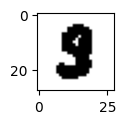

Acutual Label: 0, Predicted Label: 6


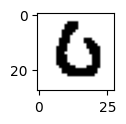

Acutual Label: 2, Predicted Label: 0


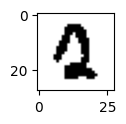

Acutual Label: 3, Predicted Label: 7


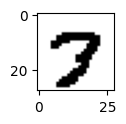

Acutual Label: 9, Predicted Label: 5


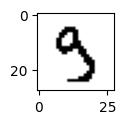

Acutual Label: 8, Predicted Label: 0


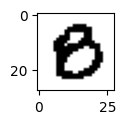

Acutual Label: 7, Predicted Label: 2


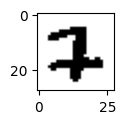

Acutual Label: 2, Predicted Label: 7


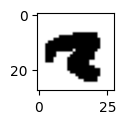

Acutual Label: 8, Predicted Label: 3


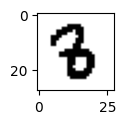

Acutual Label: 9, Predicted Label: 4


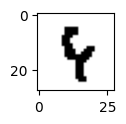

Acutual Label: 5, Predicted Label: 0


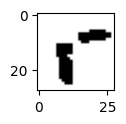

Acutual Label: 7, Predicted Label: 2


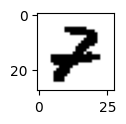

Acutual Label: 5, Predicted Label: 3


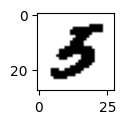

Acutual Label: 4, Predicted Label: 8


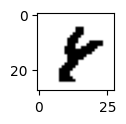

Acutual Label: 4, Predicted Label: 9


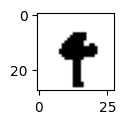

Acutual Label: 2, Predicted Label: 0


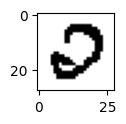

Acutual Label: 8, Predicted Label: 0


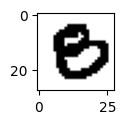

Acutual Label: 6, Predicted Label: 0


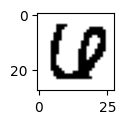

Acutual Label: 9, Predicted Label: 2


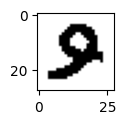

Acutual Label: 4, Predicted Label: 9


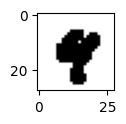

Acutual Label: 6, Predicted Label: 1


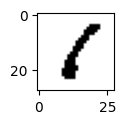

Acutual Label: 1, Predicted Label: 2


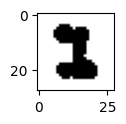

Acutual Label: 9, Predicted Label: 1


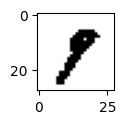

Acutual Label: 8, Predicted Label: 0


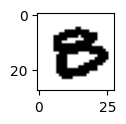

Acutual Label: 9, Predicted Label: 0


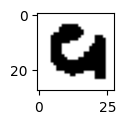

Acutual Label: 5, Predicted Label: 8


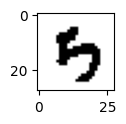

Acutual Label: 9, Predicted Label: 1


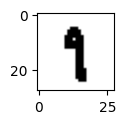

Acutual Label: 9, Predicted Label: 1


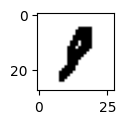

Acutual Label: 9, Predicted Label: 4


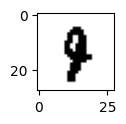

Acutual Label: 6, Predicted Label: 7


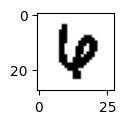

Acutual Label: 2, Predicted Label: 1


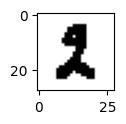

Acutual Label: 6, Predicted Label: 5


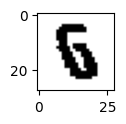

Acutual Label: 2, Predicted Label: 0


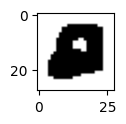

Acutual Label: 2, Predicted Label: 4


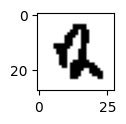

Acutual Label: 7, Predicted Label: 2


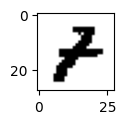

Acutual Label: 9, Predicted Label: 0


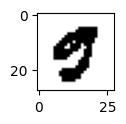

Acutual Label: 6, Predicted Label: 1


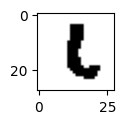

Acutual Label: 9, Predicted Label: 4


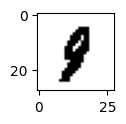

Acutual Label: 2, Predicted Label: 3


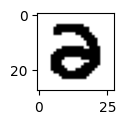

Acutual Label: 8, Predicted Label: 0


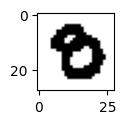

Acutual Label: 3, Predicted Label: 2


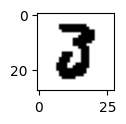

Acutual Label: 9, Predicted Label: 7


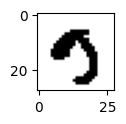

Acutual Label: 3, Predicted Label: 5


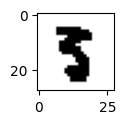

Acutual Label: 5, Predicted Label: 3


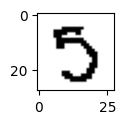

Acutual Label: 9, Predicted Label: 7


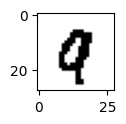

Acutual Label: 6, Predicted Label: 8


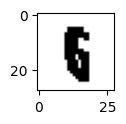

Acutual Label: 6, Predicted Label: 0


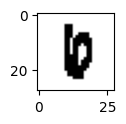

Acutual Label: 9, Predicted Label: 7


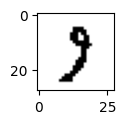

Acutual Label: 1, Predicted Label: 2


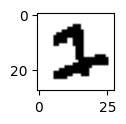

Acutual Label: 8, Predicted Label: 3


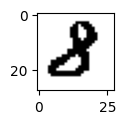

Acutual Label: 6, Predicted Label: 0


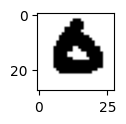

Acutual Label: 9, Predicted Label: 1


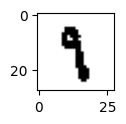

Acutual Label: 6, Predicted Label: 4


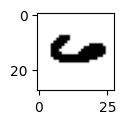

Acutual Label: 4, Predicted Label: 9


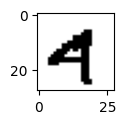

Acutual Label: 6, Predicted Label: 5


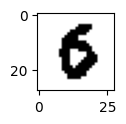

Acutual Label: 5, Predicted Label: 0


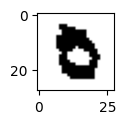

Acutual Label: 8, Predicted Label: 0


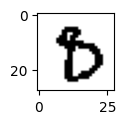

Acutual Label: 0, Predicted Label: 7


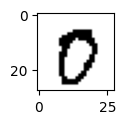

Acutual Label: 9, Predicted Label: 3


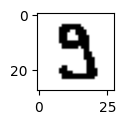

Acutual Label: 4, Predicted Label: 9


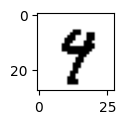

Acutual Label: 4, Predicted Label: 9


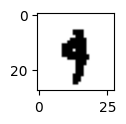

Acutual Label: 6, Predicted Label: 0


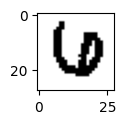

Acutual Label: 7, Predicted Label: 2


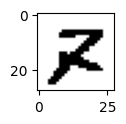

Acutual Label: 4, Predicted Label: 2


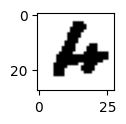

Acutual Label: 6, Predicted Label: 5


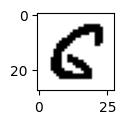

Acutual Label: 1, Predicted Label: 3


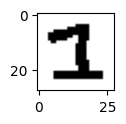

Acutual Label: 4, Predicted Label: 2


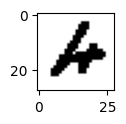

Acutual Label: 5, Predicted Label: 3


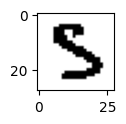

Acutual Label: 6, Predicted Label: 5


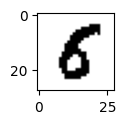

Acutual Label: 0, Predicted Label: 2


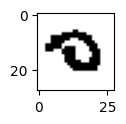

Acutual Label: 8, Predicted Label: 0


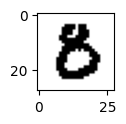

Acutual Label: 9, Predicted Label: 3


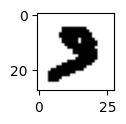

Acutual Label: 8, Predicted Label: 2


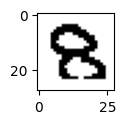

Acutual Label: 9, Predicted Label: 0


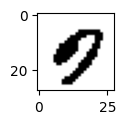

Acutual Label: 2, Predicted Label: 7


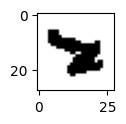

Acutual Label: 2, Predicted Label: 1


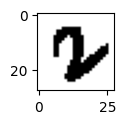

Acutual Label: 9, Predicted Label: 7


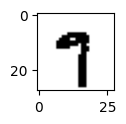

Acutual Label: 7, Predicted Label: 3


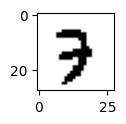

Acutual Label: 2, Predicted Label: 1


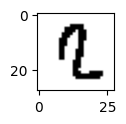

Acutual Label: 3, Predicted Label: 2


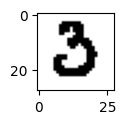

Acutual Label: 2, Predicted Label: 7


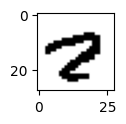

Acutual Label: 8, Predicted Label: 7


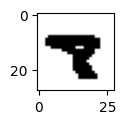

Acutual Label: 9, Predicted Label: 1


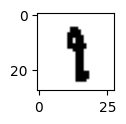

Acutual Label: 6, Predicted Label: 5


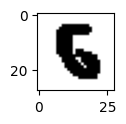

Acutual Label: 4, Predicted Label: 2


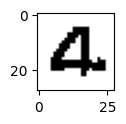

Acutual Label: 8, Predicted Label: 4


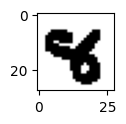

Acutual Label: 8, Predicted Label: 9


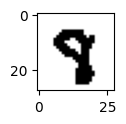

Acutual Label: 3, Predicted Label: 5


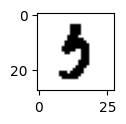

Acutual Label: 9, Predicted Label: 8


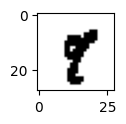

Acutual Label: 4, Predicted Label: 9


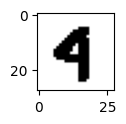

Acutual Label: 8, Predicted Label: 0


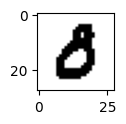

Acutual Label: 6, Predicted Label: 0


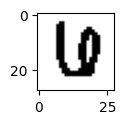

Acutual Label: 4, Predicted Label: 9


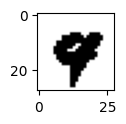

Acutual Label: 8, Predicted Label: 4


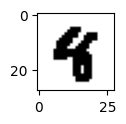

Acutual Label: 4, Predicted Label: 9


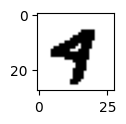

Acutual Label: 1, Predicted Label: 6


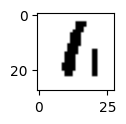

Acutual Label: 2, Predicted Label: 3


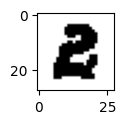

Acutual Label: 1, Predicted Label: 8


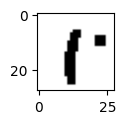

Acutual Label: 8, Predicted Label: 2


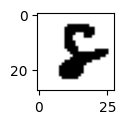

Acutual Label: 4, Predicted Label: 7


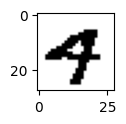

Acutual Label: 7, Predicted Label: 9


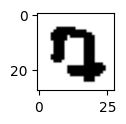

Acutual Label: 4, Predicted Label: 0


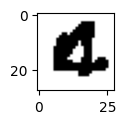

Acutual Label: 5, Predicted Label: 3


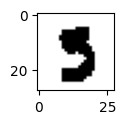

Acutual Label: 3, Predicted Label: 8


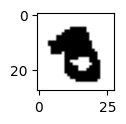

Acutual Label: 3, Predicted Label: 8


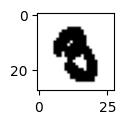

Acutual Label: 9, Predicted Label: 3


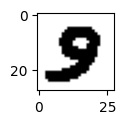

Acutual Label: 9, Predicted Label: 3


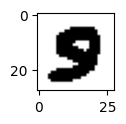

Acutual Label: 9, Predicted Label: 5


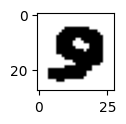

Acutual Label: 9, Predicted Label: 3


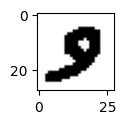

Acutual Label: 9, Predicted Label: 0


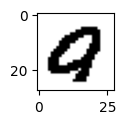

Acutual Label: 6, Predicted Label: 2


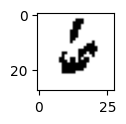

Acutual Label: 9, Predicted Label: 7


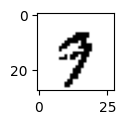

Acutual Label: 7, Predicted Label: 1


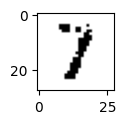

Acutual Label: 0, Predicted Label: 7


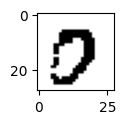

Acutual Label: 8, Predicted Label: 2


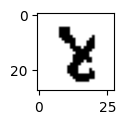

Acutual Label: 0, Predicted Label: 2


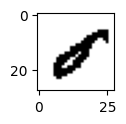

Acutual Label: 8, Predicted Label: 9


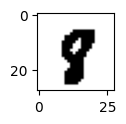

Acutual Label: 8, Predicted Label: 3


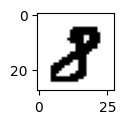

Acutual Label: 7, Predicted Label: 2


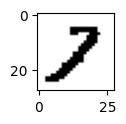

Acutual Label: 4, Predicted Label: 8


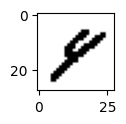

Acutual Label: 1, Predicted Label: 8


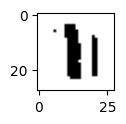

Acutual Label: 2, Predicted Label: 1


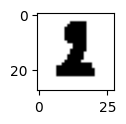

Acutual Label: 2, Predicted Label: 1


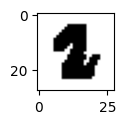

Acutual Label: 2, Predicted Label: 1


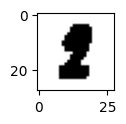

Acutual Label: 8, Predicted Label: 5


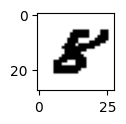

Acutual Label: 6, Predicted Label: 2


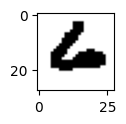

Acutual Label: 8, Predicted Label: 6


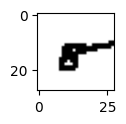

Acutual Label: 8, Predicted Label: 6


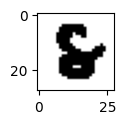

Acutual Label: 4, Predicted Label: 9


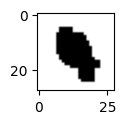

Acutual Label: 7, Predicted Label: 2


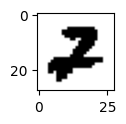

Acutual Label: 7, Predicted Label: 2


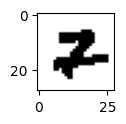

Acutual Label: 7, Predicted Label: 2


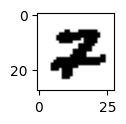

Acutual Label: 7, Predicted Label: 2


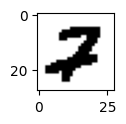

Acutual Label: 7, Predicted Label: 2


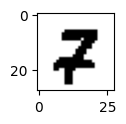

Acutual Label: 8, Predicted Label: 5


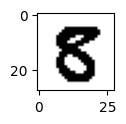

Acutual Label: 0, Predicted Label: 8


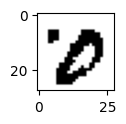

Acutual Label: 9, Predicted Label: 7


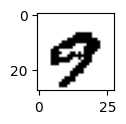

Acutual Label: 6, Predicted Label: 3


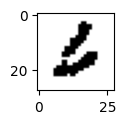

Acutual Label: 9, Predicted Label: 7


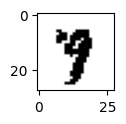

Acutual Label: 5, Predicted Label: 6


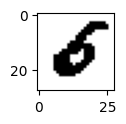

Acutual Label: 4, Predicted Label: 2


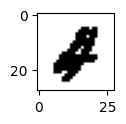

Acutual Label: 5, Predicted Label: 0


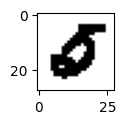

Acutual Label: 4, Predicted Label: 9


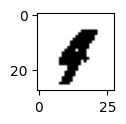

Acutual Label: 2, Predicted Label: 3


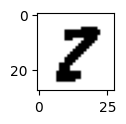

Acutual Label: 2, Predicted Label: 7


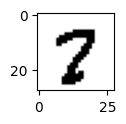

Acutual Label: 9, Predicted Label: 5


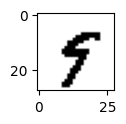

Acutual Label: 8, Predicted Label: 5


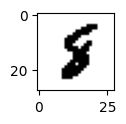

Acutual Label: 3, Predicted Label: 7


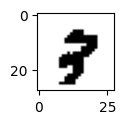

Acutual Label: 5, Predicted Label: 6


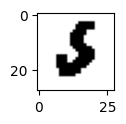

In [ ]:
# Set model to evaluation or inference mode
net.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data

    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)

    predictions = torch.argmax(outputs, dim=1)

    for i in range(data[0].shape[0]):
      pred = predictions[i].item()
      label = labels[i]
      if (label != pred):
        print(f'Acutual Label: {label}, Predicted Label: {pred}')
        img = np.reshape(images[i].cpu().numpy(), [28,28])
        imgshow("", np.uint8(img), size=1)

**Creating Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
  for i, (inputs, classes) in enumerate(testloader):
    inputs = inputs.to(device)
    classes = classes.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs, 1)

    pred_list = torch.cat([pred_list, pred.view(-1).cpu()])
    label_list = torch.cat([label_list, classes.view(-1).cpu()])

conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 974    0    2    0    0    0    1    2    1    0]
 [   0 1129    2    1    0    0    1    0    2    0]
 [   3    7 1013    3    1    0    0    5    0    0]
 [   0    0    2 1000    0    4    0    2    2    0]
 [   2    0    6    0  956    0    0    1    2   15]
 [   3    0    0    7    0  877    2    1    2    0]
 [   8    3    2    1    1    7  933    1    2    0]
 [   0    3   13    2    0    0    0 1008    0    2]
 [   8    0    5    4    2    4    2    3  943    3]
 [   5    5    1    6    4    3    0    9    1  975]]


In [ ]:
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i, ca) in enumerate(class_accuracy):
  print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 99.388%
Accuracy for 1 : 99.471%
Accuracy for 2 : 98.159%
Accuracy for 3 : 99.010%
Accuracy for 4 : 97.352%
Accuracy for 5 : 98.318%
Accuracy for 6 : 97.390%
Accuracy for 7 : 98.054%
Accuracy for 8 : 96.817%
Accuracy for 9 : 96.630%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(label_list.numpy(), pred_list.numpy()))